<a href="https://colab.research.google.com/github/sujan9945587042/TimeSer/blob/main/Time_series_handson_Air_passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/AirPassengers.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df.shape

(144, 2)

In [5]:
df['Month']=pd.to_datetime(df['Month'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
df.isnull().sum()

,0
Month,0
#Passengers,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.index=df['Month']

In [10]:
df.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [11]:
df.drop('Month',axis=1,inplace=True)

In [12]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

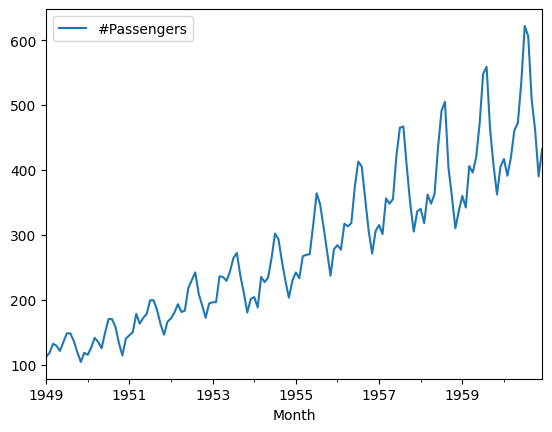

In [13]:
df.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
result=adfuller(df['#Passengers'])

In [16]:
result

(np.float64(0.8153688792060528),
 np.float64(0.9918802434376411),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [17]:
rolling_mean=df.rolling(window=12).mean()

In [18]:
rolling_mean.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [19]:
df_detrented=df-rolling_mean
df_detrented

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,142.666667
1960-09-01,40.916667
1960-10-01,-10.583333


<Axes: title={'center': 'Detrended data'}, xlabel='Month'>

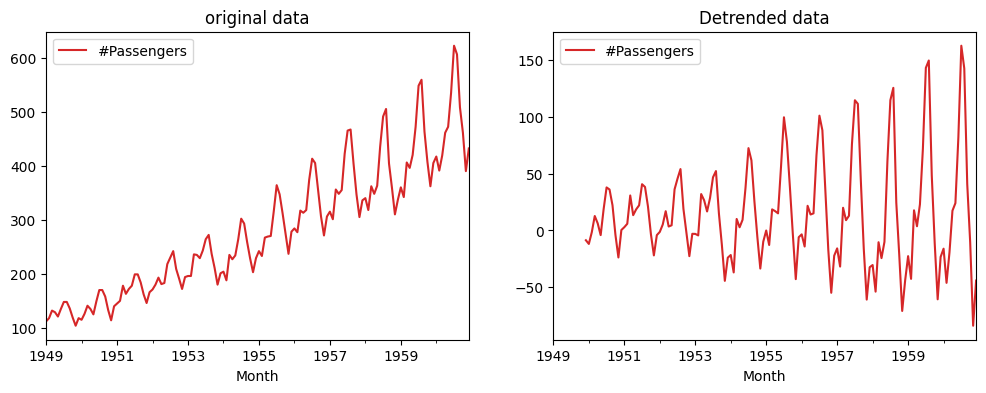

In [20]:
ax1=plt.subplot(1,2,1)
df.plot(figsize=(12,4),color='tab:red',title='original data',ax=ax1)
ax2=plt.subplot(1,2,2)
df_detrented.plot(figsize=(12,4),color='tab:red',title='Detrended data',ax=ax2)

In [21]:
df_detrented.dropna(inplace=True)

In [22]:
result=adfuller(df_detrented['#Passengers'])

In [23]:
result

(np.float64(-3.1649681299551475),
 np.float64(0.02210413947387869),
 13,
 119,
 {'1%': np.float64(-3.4865346059036564),
  '5%': np.float64(-2.8861509858476264),
  '10%': np.float64(-2.579896092790057)},
 np.float64(906.2878851500944))

In [24]:
m=df_detrented.rolling(window=12).mean()
s=df_detrented.rolling(window=12).std()

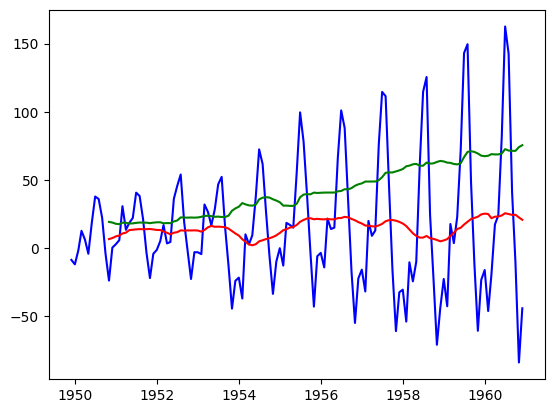

In [25]:
plt.plot(df_detrented,color='blue',label='original')
plt.plot(m,color='red',label='mean')

plt.plot(s,color='green',label='std')
plt.show()

In [26]:
train=df_detrented[:120]['#Passengers']
test=df_detrented[120:]['#Passengers']

In [27]:
train

,#Passengers
Month,
1949-12-01,-8.666667
1950-01-01,-11.916667
1950-02-01,-1.583333
1950-03-01,12.666667
1950-04-01,6.166667
...,...
1959-07-01,143.083333
1959-08-01,149.583333
1959-09-01,48.666667


In [28]:
test

,#Passengers
Month,
1959-12-01,-23.333333
1960-01-01,-16.083333
1960-02-01,-46.166667
1960-03-01,-19.250000
1960-04-01,17.333333
1960-05-01,24.000000
1960-06-01,81.750000
1960-07-01,162.583333
1960-08-01,142.666667


In [29]:
from statsmodels.tsa.arima.model import ARIMA

In [30]:
model=ARIMA(train,order=(1,0,2))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [31]:
model_fit=model.fit()

In [32]:
df_detrented['predicted']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [33]:
df_detrented

,#Passengers,predicted
Month,,
1949-12-01,-8.666667,NaN
1950-01-01,-11.916667,NaN
1950-02-01,-1.583333,NaN
1950-03-01,12.666667,NaN
1950-04-01,6.166667,NaN
...,...,...
1960-08-01,142.666667,13.223011
1960-09-01,40.916667,13.280638
1960-10-01,-10.583333,13.306771


<Axes: xlabel='Month'>

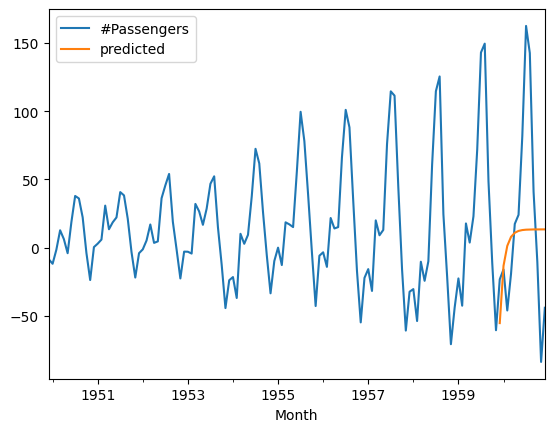

In [34]:
df_detrented[['#Passengers','predicted']].plot()

In [35]:
#Auto_arima

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [41]:
model=SARIMAX(train,order=(3,0,2),seasonal_order=(1,0,1,12))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
model_fit=model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [43]:
df_detrented['predicted']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

<Axes: xlabel='Month'>

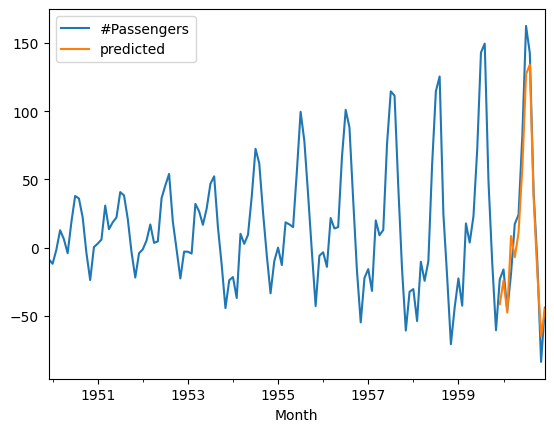

In [44]:
df_detrented[['#Passengers','predicted']].plot()

In [55]:
forcast=model_fit.get_forecast(steps=48)
future_preds=forcast.predicted_mean

<Axes: xlabel='Month'>

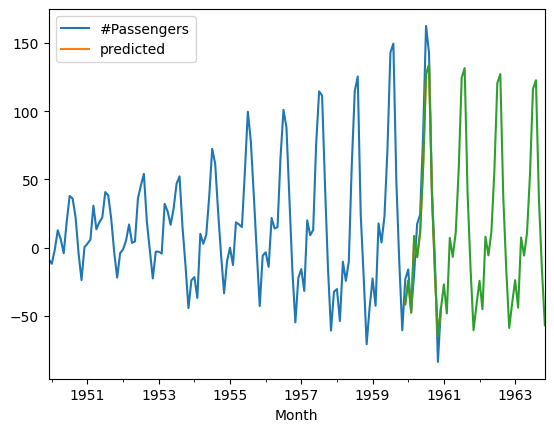

In [56]:
df_detrented.plot()
future_preds.plot()